In [ ]:
# 필요한 모듈 임포트
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [ ]:
# 기상관측 자료 로딩
obs_list = pd.read_csv('/content/기상관측자료2017.csv', encoding='euc-kr')
obs_list

,지점,지점명,일시,최고기온(°C),최대 순간 풍속(m/s)
0,12,안면도(감),2017-01-01,10.3,5.8
1,12,안면도(감),2017-01-02,11.6,7.1
2,12,안면도(감),2017-01-03,9.7,7.2
3,12,안면도(감),2017-01-04,10.6,7.8
4,12,안면도(감),2017-01-05,8.3,9.3
...,...,...,...,...,...
183648,980,강정,2017-12-07,13.3,12.9
183649,980,강정,2017-12-08,6.3,12.7
183650,980,강정,2017-12-09,11.6,9.2
183651,980,강정,2017-12-10,13.5,13.5


In [ ]:
# 데이터 컬럼 및 타입 확인
obs_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183653 entries, 0 to 183652
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   지점             183653 non-null  int64  
 1   지점명            183653 non-null  object 
 2   일시             183653 non-null  object 
 3   최고기온(°C)       183451 non-null  float64
 4   최대 순간 풍속(m/s)  183277 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.0+ MB


In [ ]:
# 컬럼명 변경
obs_list.columns = ['지점','지점명','일시','최고기온','최고풍속']

In [ ]:
# 데이터 타입 변경
obs_list['지점'] = obs_list['지점'].astype(object)
obs_list['지점명'] = obs_list['지점명'].astype(object)
obs_list['최고기온'] = obs_list['최고기온'].astype(float)
obs_list['최고풍속'] = obs_list['최고풍속'].astype(float)
obs_list['일시'] = pd.to_datetime(obs_list['일시'], format='%Y-%m-%d')
obs_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183653 entries, 0 to 183652
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   지점      183653 non-null  object        
 1   지점명     183653 non-null  object        
 2   일시      183653 non-null  datetime64[ns]
 3   최고기온    183451 non-null  float64       
 4   최고풍속    183277 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 7.0+ MB


In [ ]:
# 화재발생 시군구와 매칭하기 위하여 기상관측지점명 전체 집합(Set) 생성
obs_branch_set = set(obs_list['지점명'])
print(len(obs_branch_set))
print(obs_branch_set)

511
{'옹도', '간성', '횡성', '덕유산', '세종전의', '신녕', '우도', '소보', '원통', '양구', '강정', '공도', '도양', '남항 ', '서이말', '황성', '죽변', '화순능주', '용인', '소리도', '서부', '백사', '길안', '가덕도', '서거차도', '소곡', '청도금천', '신림', '서하', '변산', '단성', '황전', '산내', '전남도청', '대정', '예천', '군위', '강북', '의흥', '영덕읍', '죽장', '한림', '압해도', '대부도', '가거도', '도라산', '여주', '한라생태숲', '청운', '괴산', '상동', '진북', '봉화읍', '광진', '정안', '평창', '하장', '무등산', '청하', '진도(레)', '백천', '진봉', '임자도', '김화', '시천', '어리목', '고양고봉', '월정', '삼척', '증평', '영암', '현서', '고양', '공성', '구례', '대진', '함평', '부천', '광산', '내장산', '은척', '청덕', '석포', '화천', '광양백운산', '옥도', '거문도', '중문', '신포', '정자', '창수', '대신', '상조도', '연천청산', '월야', '고령', '청천', '안면도(감)', '송백', '양지암', '동향', '마현', '남양주', '사하', '대곡', '홍북', '지산', '임계', '말도', '방산', '해안', '양도', '용문산', '초도', '목덕도', '노은', '복내', '금남', '무주', '순천시', '백야', '위도', '함안', '여서도', '설악동', '대천항', '부평', '진영', '심원', '상주면', '적성', '인천연수', '현산', '양산상북', '옥계', '담양', '수안보', '양주', '외동', '현충원', '서석', '옥산', '가덕', '기장', '태하', '설악산', '사량도', '사내', '신동', '삼가', '대흘', '감포', '유구', '주왕산', '사천', '구룡

In [ ]:
# 소방청 국가화재정보 시도단위 화재발생현황목록 로딩
fire_list = pd.read_csv('/content/화재발생정보2017.csv', encoding='euc-kr')
fire_list

,연번,사망,부상,인명피해(명)소계,화재발생년월일,시도,시군구,읍면동,재산피해소계,부동산,동산,장소대분류,장소중분류,장소소분류
0,1,0,0,0,2017-01-01 00:00,서울특별시,강남구,논현동,13391,7223.0,6168.0,주거,단독주택,상가주택(주택부분에서 화재가 발생한 경우에만 해당)
1,2,0,0,0,2017-01-01 00:09,경상북도,문경시,흥덕동,195,177.0,18.0,생활서비스,음식점,한식
2,3,0,0,0,2017-01-01 00:14,경상남도,거제시,일운면,22,0.0,22.0,기타,야외,기타야외
3,4,0,0,0,2017-01-01 00:57,경기도,안산시상록구,본오동,1,0.0,1.0,주거,단독주택,다가구주택
4,5,0,0,0,2017-01-01 00:59,전라북도,익산시,인화동1가,966,796.0,170.0,"판매,업무시설",숙박시설,모텔
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44173,44174,0,0,0,2017-12-31 22:54,강원도,동해시,망상동,0,NaN,NaN,기타,야외,기타야외
44174,44175,0,0,0,2017-12-31 23:26,서울특별시,서대문구,현저동,5255,3345.0,1910.0,주거,단독주택,단독주택
44175,44176,0,0,0,2017-12-31 23:35,광주광역시,북구,유동,851,601.0,250.0,"의료,복지시설",의료시설,병원
44176,44177,0,0,0,2017-12-31 23:39,전라북도,남원시,주천면,957,957.0,0.0,"판매,업무시설",일반업무,기타 일반업무시설


In [ ]:
fire_list

,연번,사망,부상,인명피해(명)소계,화재발생년월일,시도,시군구,읍면동,재산피해소계,부동산,동산,장소대분류,장소중분류,장소소분류
0,1,0,0,0,2017-01-01 00:00,서울특별시,강남구,논현동,13391,7223.0,6168.0,주거,단독주택,상가주택(주택부분에서 화재가 발생한 경우에만 해당)
1,2,0,0,0,2017-01-01 00:09,경상북도,문경시,흥덕동,195,177.0,18.0,생활서비스,음식점,한식
2,3,0,0,0,2017-01-01 00:14,경상남도,거제시,일운면,22,0.0,22.0,기타,야외,기타야외
3,4,0,0,0,2017-01-01 00:57,경기도,안산시상록구,본오동,1,0.0,1.0,주거,단독주택,다가구주택
4,5,0,0,0,2017-01-01 00:59,전라북도,익산시,인화동1가,966,796.0,170.0,"판매,업무시설",숙박시설,모텔
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44173,44174,0,0,0,2017-12-31 22:54,강원도,동해시,망상동,0,NaN,NaN,기타,야외,기타야외
44174,44175,0,0,0,2017-12-31 23:26,서울특별시,서대문구,현저동,5255,3345.0,1910.0,주거,단독주택,단독주택
44175,44176,0,0,0,2017-12-31 23:35,광주광역시,북구,유동,851,601.0,250.0,"의료,복지시설",의료시설,병원
44176,44177,0,0,0,2017-12-31 23:39,전라북도,남원시,주천면,957,957.0,0.0,"판매,업무시설",일반업무,기타 일반업무시설


In [ ]:
fire_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44178 entries, 0 to 44177
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   연번         44178 non-null  int64  
 1   사망         44178 non-null  int64  
 2   부상         44178 non-null  int64  
 3   인명피해(명)소계  44178 non-null  int64  
 4   화재발생년월일    44178 non-null  object 
 5   시도         44178 non-null  object 
 6   시군구        44178 non-null  object 
 7   읍면동        44164 non-null  object 
 8   재산피해소계     44178 non-null  int64  
 9   부동산        40320 non-null  float64
 10  동산         40320 non-null  float64
 11  장소대분류      44178 non-null  object 
 12  장소중분류      44178 non-null  object 
 13  장소소분류      44178 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 4.7+ MB


In [ ]:
# 학습에 필요없는 컬럼 제거
fire_list.drop(['연번', '사망', '부상', '인명피해(명)소계', '시도', '읍면동', '장소대분류', '부동산', '동산', '장소대분류', '장소중분류', '장소소분류'],axis=1,inplace=True)
fire_list

,화재발생년월일,시군구,재산피해소계
0,2017-01-01 00:00,강남구,13391
1,2017-01-01 00:09,문경시,195
2,2017-01-01 00:14,거제시,22
3,2017-01-01 00:57,안산시상록구,1
4,2017-01-01 00:59,익산시,966
...,...,...,...
44173,2017-12-31 22:54,동해시,0
44174,2017-12-31 23:26,서대문구,5255
44175,2017-12-31 23:35,북구,851
44176,2017-12-31 23:39,남원시,957


In [ ]:
# 기상관측자료의 관측일시(연월일만 존재)와 매칭하기 위해서 화재발생년월일 중 시간 정보 삭제
def date_convert(x):
  split_x = x.split()
  return split_x[0]

fire_list['화재발생년월일']=fire_list['화재발생년월일'].apply(date_convert)
fire_list

,화재발생년월일,시군구,재산피해소계
0,2017-01-01,강남구,13391
1,2017-01-01,문경시,195
2,2017-01-01,거제시,22
3,2017-01-01,안산시상록구,1
4,2017-01-01,익산시,966
...,...,...,...
44173,2017-12-31,동해시,0
44174,2017-12-31,서대문구,5255
44175,2017-12-31,북구,851
44176,2017-12-31,남원시,957


In [ ]:
# 데이터 타입 확인
fire_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44178 entries, 0 to 44177
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   화재발생년월일  44178 non-null  object
 1   시군구      44178 non-null  object
 2   재산피해소계   44178 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [ ]:
# 데이터 타입 변환
fire_list['화재발생년월일'] = pd.to_datetime(fire_list['화재발생년월일'], format='%Y-%m-%d')
fire_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44178 entries, 0 to 44177
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   화재발생년월일  44178 non-null  datetime64[ns]
 1   시군구      44178 non-null  object        
 2   재산피해소계   44178 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.0+ MB


In [ ]:
# 기상관측자료의 지점명과 매칭시키기 위해 (시군구 등 행정단위가 없음) 화재발생자료의 시군구 컬럼에서 행정단위 제거 및 기상관측지점명과 매칭
def trunk_region(x) :
  for region in obs_branch_set:  
    if region in x:      
      return region
  return np.NaN

fire_list['시군구'] = fire_list['시군구'].apply(trunk_region)
fire_list

,화재발생년월일,시군구,재산피해소계
0,2017-01-01,강남,13391
1,2017-01-01,NaN,195
2,2017-01-01,NaN,22
3,2017-01-01,안산,1
4,2017-01-01,익산,966
...,...,...,...
44173,2017-12-31,NaN,0
44174,2017-12-31,서대문,5255
44175,2017-12-31,북구,851
44176,2017-12-31,NaN,957


In [ ]:
# 매칭 안된 시군구 갯수 확인
fire_list.isna().sum()

화재발생년월일        0
시군구        19189
재산피해소계         0
dtype: int64

In [ ]:
# 매칭 안된 화재발생 자료 삭제
fire_list.dropna(axis=0, inplace=True)
fire_list.isna().sum()

화재발생년월일    0
시군구        0
재산피해소계     0
dtype: int64

In [ ]:
fire_list

,화재발생년월일,시군구,재산피해소계
0,2017-01-01,강남,13391
3,2017-01-01,안산,1
4,2017-01-01,익산,966
5,2017-01-01,하남,3638
7,2017-01-01,시흥,5490
...,...,...,...
44167,2017-12-31,송파,11448
44170,2017-12-31,고성,0
44174,2017-12-31,서대문,5255
44175,2017-12-31,북구,851


In [ ]:
# 매칭된 시군구 및 갯수 확인
print(fire_list['시군구'].unique())
print(fire_list['시군구'].nunique())

['강남' '안산' '익산' '하남' '시흥' '양구' '양주' '부평' '마포' '강서' '예천' '북구' '함안' '아산'
 '달성' '예산' '금정구' '음성' '완산' '중구' '강동' '강북' '공주' '서천' '화순' '양천' '진천' '서초'
 '송파' '평창' '과천' '관악' '광산' '부천' '장성' '광명' '김포' '경산' '동래' '서대문' '은평' '화성'
 '평택' '김천' '중랑' '기장' '담양' '태안' '구리' '노원' '용인' '부산진' '군포' '나주' '고성' '광진'
 '사하' '성남' '성주' '의정부' '청양' '영도' '대덕' '논산' '함평' '진안' '영암' '의왕' '오산' '해운대'
 '칠곡' '창녕' '완주' '당진' '여주' '횡성' '곡성' '구로' '금천' '포천' '안양' '순천시' '구례' '안성'
 '삼척' '고양' '계룡' '성동' '고령' '용산' '단양' '청도' '사상' '동대문' '양양' '사천' '하동' '무안'
 '보성' '옥천' '증평' '김제' '도봉' '영양' '화천' '영동' '상당' '괴산' '군위' '진해' '무주']
111


In [ ]:
# 기상관측자료와 화재발생자료를 시군구 및 화재발생년월일을 기준으로 조인
fire_obs_list = pd.merge(left = fire_list , right = obs_list, left_on = ['시군구','화재발생년월일'], right_on = ['지점명','일시'], how = "inner")
fire_obs_list

,화재발생년월일,시군구,재산피해소계,지점,지점명,일시,최고기온,최고풍속
0,2017-01-01,강남,13391,400,강남,2017-01-01,7.0,3.3
1,2017-01-01,안산,1,545,안산,2017-01-01,10.2,4.1
2,2017-01-01,안산,135,545,안산,2017-01-01,10.2,4.1
3,2017-01-01,익산,966,702,익산,2017-01-01,10.8,3.3
4,2017-01-01,하남,3638,444,하남,2017-01-01,7.8,3.9
...,...,...,...,...,...,...,...,...
24659,2017-12-31,태안,5055,627,태안,2017-12-31,4.8,8.1
24660,2017-12-31,함안,0,920,함안,2017-12-31,8.4,11.2
24661,2017-12-31,고성,0,918,고성,2017-12-31,7.9,12.1
24662,2017-12-31,서대문,5255,412,서대문,2017-12-31,3.1,7.4


In [ ]:
# 결측값 갯수 확인
fire_obs_list.isna().sum()

화재발생년월일     0
시군구         0
재산피해소계      0
지점          0
지점명         0
일시          0
최고기온       62
최고풍속       94
dtype: int64

In [ ]:
# 결측데이터 삭제
fire_obs_list.dropna(axis=0,inplace=True)

In [ ]:
fire_obs_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24508 entries, 0 to 24663
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   화재발생년월일  24508 non-null  datetime64[ns]
 1   시군구      24508 non-null  object        
 2   재산피해소계   24508 non-null  int64         
 3   지점       24508 non-null  object        
 4   지점명      24508 non-null  object        
 5   일시       24508 non-null  datetime64[ns]
 6   최고기온     24508 non-null  float64       
 7   최고풍속     24508 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
# 중복 컬럼 삭제
fire_obs_list.drop(['지점','지점명','일시'],axis=1, inplace=True)
fire_obs_list

,화재발생년월일,시군구,재산피해소계,최고기온,최고풍속
0,2017-01-01,강남,13391,7.0,3.3
1,2017-01-01,안산,1,10.2,4.1
2,2017-01-01,안산,135,10.2,4.1
3,2017-01-01,익산,966,10.8,3.3
4,2017-01-01,하남,3638,7.8,3.9
...,...,...,...,...,...
24659,2017-12-31,태안,5055,4.8,8.1
24660,2017-12-31,함안,0,8.4,11.2
24661,2017-12-31,고성,0,7.9,12.1
24662,2017-12-31,서대문,5255,3.1,7.4


In [ ]:
# 특징과 정답(label) 추출
x_data = fire_obs_list[['최고기온','최고풍속']]
y_data = fire_obs_list['재산피해소계']

In [ ]:
x_data

,최고기온,최고풍속
0,7.0,3.3
1,10.2,4.1
2,10.2,4.1
3,10.8,3.3
4,7.8,3.9
...,...,...
24659,4.8,8.1
24660,8.4,11.2
24661,7.9,12.1
24662,3.1,7.4


In [ ]:
y_data

0        13391
1            1
2          135
3          966
4         3638
         ...  
24659     5055
24660        0
24661        0
24662     5255
24663      572
Name: 재산피해소계, Length: 24508, dtype: int64

In [ ]:
# 학습집합과 테스트집합 분리 (30%)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

In [ ]:
# 분리된 갯수 확인
print(x_train.shape); print(x_test.shape); print(y_train.shape); print(y_test.shape)

(17155, 2)
(7353, 2)
(17155,)
(7353,)


In [ ]:
# 데이터 스케일 조정

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled

array([[-0.21301532, -0.04169201],
       [ 1.52570803,  0.07308702],
       [-1.05836147, -0.34776941],
       ...,
       [ 0.32493224,  0.14960637],
       [ 1.51610182, -0.00343233],
       [ 1.38161493, -0.65384682]])

In [ ]:
x_test_scaled

array([[ 0.92051703, -0.00343233],
       [-0.09774084, -0.88340487],
       [ 1.80428801, -0.42428876],
       ...,
       [-0.94308699,  2.02433048],
       [ 1.12224736,  0.18786605],
       [-0.41474565,  0.03482734]])

In [ ]:
# 모델 정의를 위한 모듈 임포트
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# 텐서플로우 학습데이터셋 생성
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_scaled, y_train.values))
train_dataset = train_dataset.shuffle(len(train_dataset)).batch(1)

In [ ]:
# 화재 발생 건수 예측 모델 정의 (지역별 최고 기온, 최대 풍속을 입력 특징으로 하고 화재 발생 피해액 예측)

model = Sequential()
    
model.add(Dense(16,activation='relu',input_dim=2))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='linear')) #as this is Regression problem

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                48        
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 학습
model.compile(loss='MeanAbsoluteError', optimizer='Adam')
hist = model.fit(train_dataset, epochs=15)

Epoch 1/15


17155/17155 [==============================] - 41s 2ms/step - loss: 12274.9707
Epoch 2/15
17155/17155 [==============================] - 40s 2ms/step - loss: 12267.7656
Epoch 3/15
17155/17155 [==============================] - 40s 2ms/step - loss: 12267.3809
Epoch 4/15
17155/17155 [==============================] - 44s 3ms/step - loss: 12267.5703
Epoch 5/15
17155/17155 [==============================] - 41s 2ms/step - loss: 12267.4883
Epoch 6/15
17155/17155 [==============================] - 40s 2ms/step - loss: 12267.4834
Epoch 7/15
17155/17155 [==============================] - 39s 2ms/step - loss: 12267.3164
Epoch 8/15
17155/17155 [==============================] - 39s 2ms/step - loss: 12267.3633
Epoch 9/15
17155/17155 [==============================] - 40s 2ms/step - loss: 12267.2852
Epoch 10/15
17155/17155 [==============================] - 39s 2ms/step - loss: 12267.2451
Epoch 11/15
17155/17155 [==============================] - 39s 2ms/step - loss: 12267.1367
Epoch 12/15
17155/1

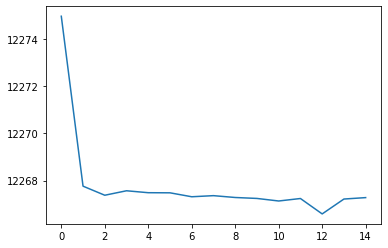

In [ ]:
# 학습과정 가시화
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.show()


In [ ]:
# 모델 평가
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_scaled, y_test.values))
test_dataset = test_dataset.shuffle(len(test_dataset)).batch(1)
results = model.evaluate(test_dataset)
print(f"test loss: {results}")

7353/7353 [==============================] - 13s 2ms/step - loss: 12818.1816
test loss, test acc: 12818.181640625


In [ ]:
# 추론
real_data = scaler.transform([[30.4,25.0]])
y_pred = model.predict(real_data)
print(y_pred)

[[1085.1528]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
